# Multiple linear regression

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale

# import the Counter class from the collections module, which will be used for counting the occurrence of elements in a dataset, facilitating frequency analysis.
from collections import Counter

In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sns.set_style('whitegrid')

#### (Multiple) linear regression on the enrollment data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
address = '/content/drive/MyDrive/python-for-data-science-and-machine-learning-essential-training-part-1-3006708-main (1)/python-for-data-science-and-machine-learning-essential-training-part-2-3016934-main/data/enrollment_forecast.csv'

enroll = pd.read_csv(address)
enroll.columns = ['year', 'roll', 'unem', 'hgrad', 'inc']
enroll.head()

year  roll  unem  hgrad   inc
0     1  5501   8.1   9552  1923
1     2  5945   7.0   9680  1961
2     3  6629   7.3   9731  1979
3     4  7556   7.5  11666  2030
4     5  8716   7.0  14675  2112

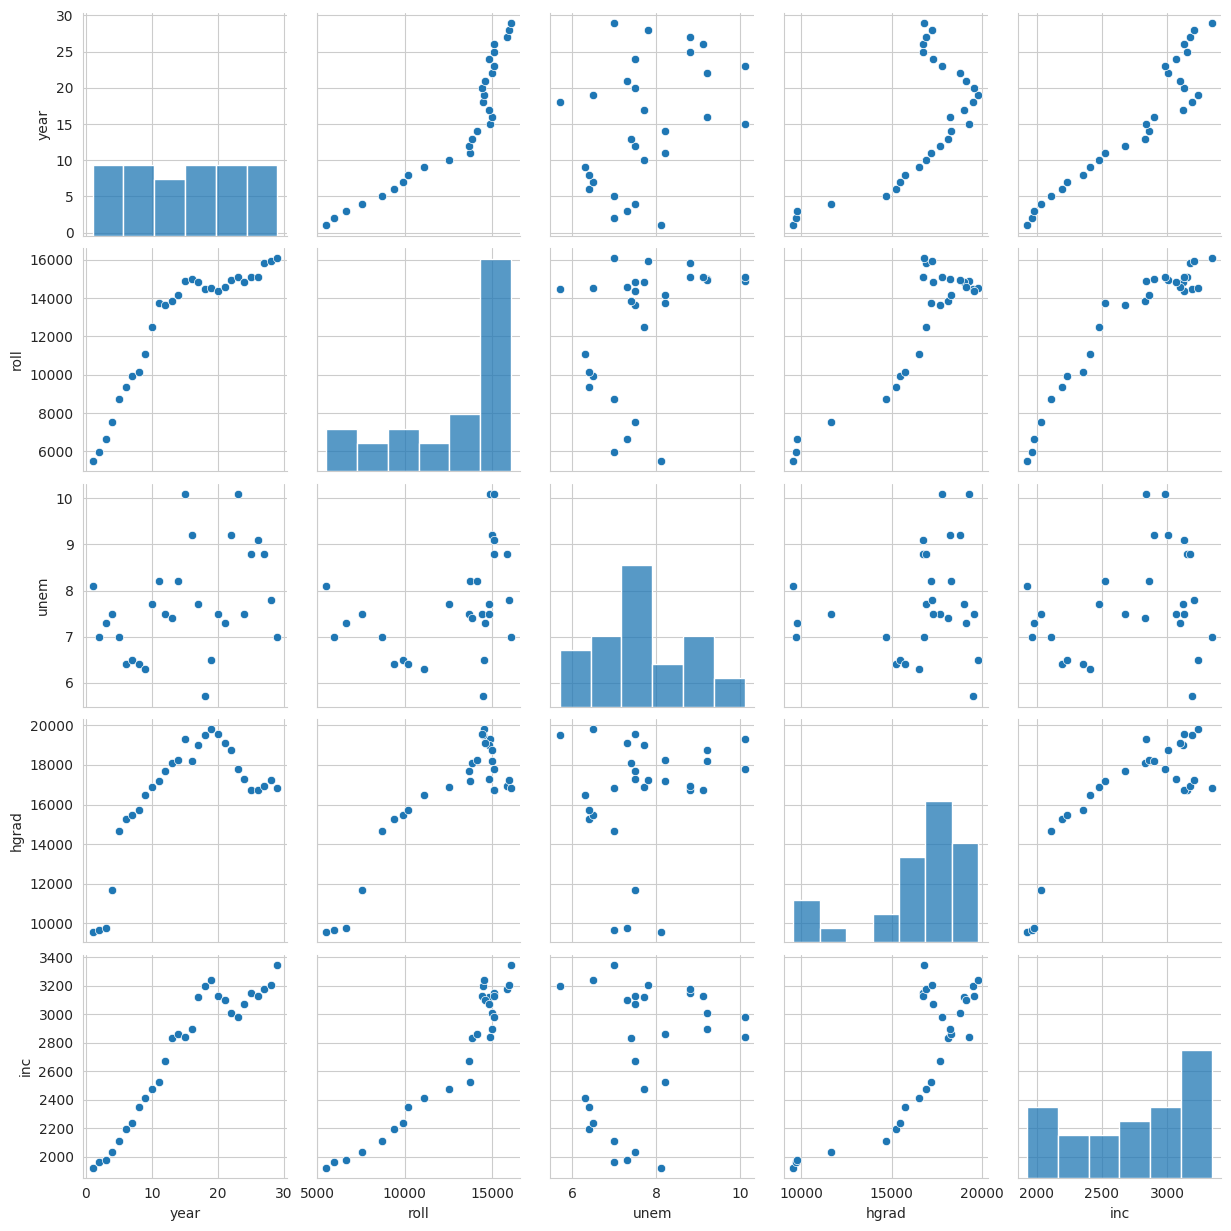

In [5]:
#Check if data is linear
sns.pairplot(enroll)

In [6]:
#check if Pearson correlation is low
print(enroll.corr())

           year      roll      unem     hgrad       inc
year   1.000000  0.900934  0.378305  0.670300  0.944287
roll   0.900934  1.000000  0.391344  0.890294  0.949876
unem   0.378305  0.391344  1.000000  0.177376  0.282310
hgrad  0.670300  0.890294  0.177376  1.000000  0.820089
inc    0.944287  0.949876  0.282310  0.820089  1.000000


In [10]:
enroll_data = enroll[['unem', 'hgrad']].values
enroll_target = enroll['roll'].values
enroll_data_names = ['unem', 'hgrad']

x,y = scale(enroll_data), enroll_target

In [15]:
#make sure no missing values
missing_values = x==np.nan
x[missing_values ==True]

array([], dtype=float64)

In [16]:
LinReg = LinearRegression()
LinReg.fit(x,y)
print(LinReg.score(x,y))

0.8488812666133723
